In [135]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [136]:
data=pd.read_csv('HousePrices.csv')
data.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

<AxesSubplot:>

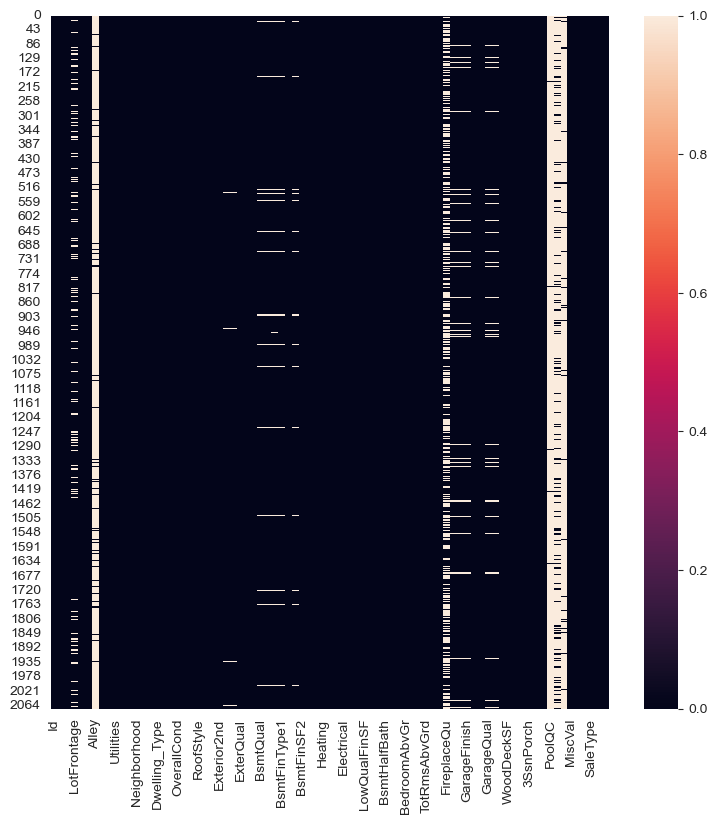

In [138]:
plt.figure(figsize=(9,9))

sns.heatmap(data.isnull())

In [139]:
data_missing=round((data.isnull().sum())/(data.isnull().count())*100,1)
data_missing.sort_values(ascending=False).head(20)

PoolQC          99.6
MiscFeature     96.1
Alley           93.8
Fence           80.5
FireplaceQu     47.7
LotFrontage     15.4
GarageYrBlt      5.5
GarageFinish     5.5
GarageType       5.5
GarageQual       5.5
GarageCond       5.5
BsmtExposure     2.9
BsmtFinType2     2.9
BsmtQual         2.8
BsmtCond         2.8
BsmtFinType1     2.8
MasVnrType       0.7
MasVnrArea       0.7
Id               0.0
Functional       0.0
dtype: float64

In [140]:
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          2065
MiscFeature     1993
Alley           1944
Fence           1669
FireplaceQu      988
LotFrontage      320
GarageYrBlt      113
GarageCond       113
GarageType       113
GarageFinish     113
GarageQual       113
BsmtExposure      61
BsmtFinType2      60
BsmtQual          59
BsmtCond          59
BsmtFinType1      59
MasVnrArea        14
MasVnrType        14
Electrical         1
Id                 0
dtype: int64

In [141]:
# lotFrontage is : Linear feet of street-connected to the property where nan replace by median
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

# Alley is type of alley access where NA means no alley access 
data['Alley'].fillna('No Access',inplace=True)

# in BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1 where we have NA in the dataset means no basement
data['BsmtQual'].fillna('No Basement',inplace=True)
data['BsmtExposure'].fillna('No Basement',inplace=True)
data['BsmtFinType2'].fillna('No Basement',inplace=True)
data['BsmtCond'].fillna('No Basement',inplace=True)
data['BsmtFinType1'].fillna('No Basement',inplace=True)

#same for garages
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageQual'].fillna('No Garage', inplace=True)
data['GarageCond'].fillna('No Garage', inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)

data['PoolQC'].fillna('No Pool', inplace=True)
data['Fence'].fillna('No Fence', inplace=True)
data['FireplaceQu'].fillna('No Fireplace', inplace=True)
data['MiscFeature'].fillna('None', inplace=True)

In [142]:
data.isnull().sum().sort_values(ascending=False).head(4)

MasVnrType     14
MasVnrArea     14
Electrical      1
KitchenQual     0
dtype: int64

In [143]:
data['MasVnrArea'].fillna(0, inplace=True)
data['MasVnrType'].fillna('None', inplace=True)

In [144]:
data.dropna(inplace=True)
data.drop('Id',inplace=True,axis=1)

In [145]:
data.isnull().sum().sort_values()

Dwell_Type             0
GarageType             0
FireplaceQu            0
Fireplaces             0
Functional             0
                      ..
Exterior2nd            0
Exterior1st            0
RoofMatl               0
SaleCondition          0
Property_Sale_Price    0
Length: 80, dtype: int64

<AxesSubplot:>

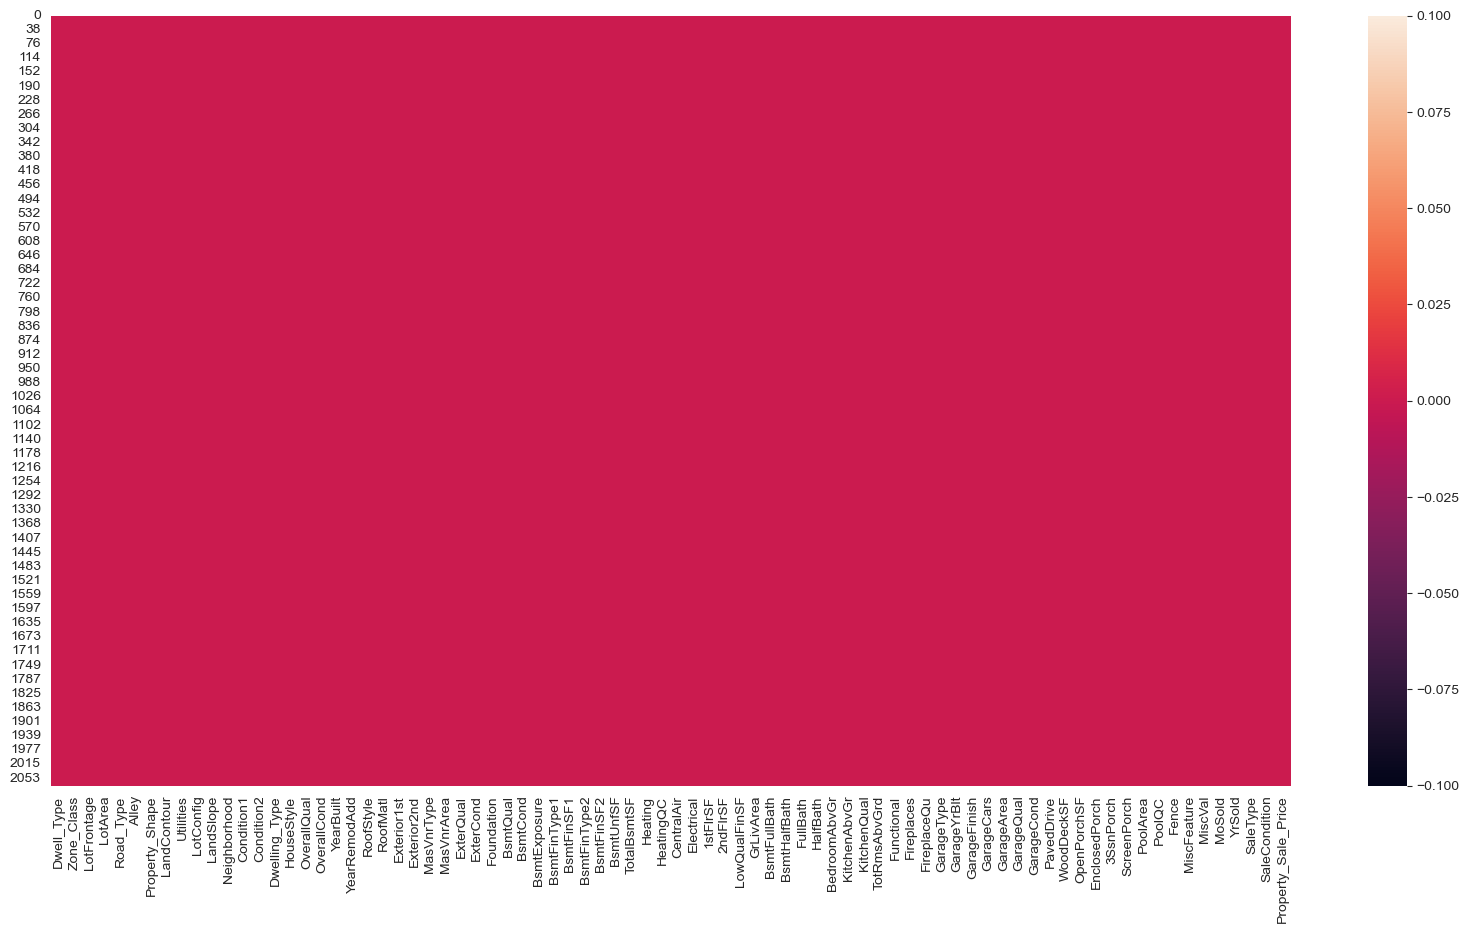

In [146]:
plt.figure(figsize=(20,10))

sns.heatmap(data.isnull())

<AxesSubplot:>

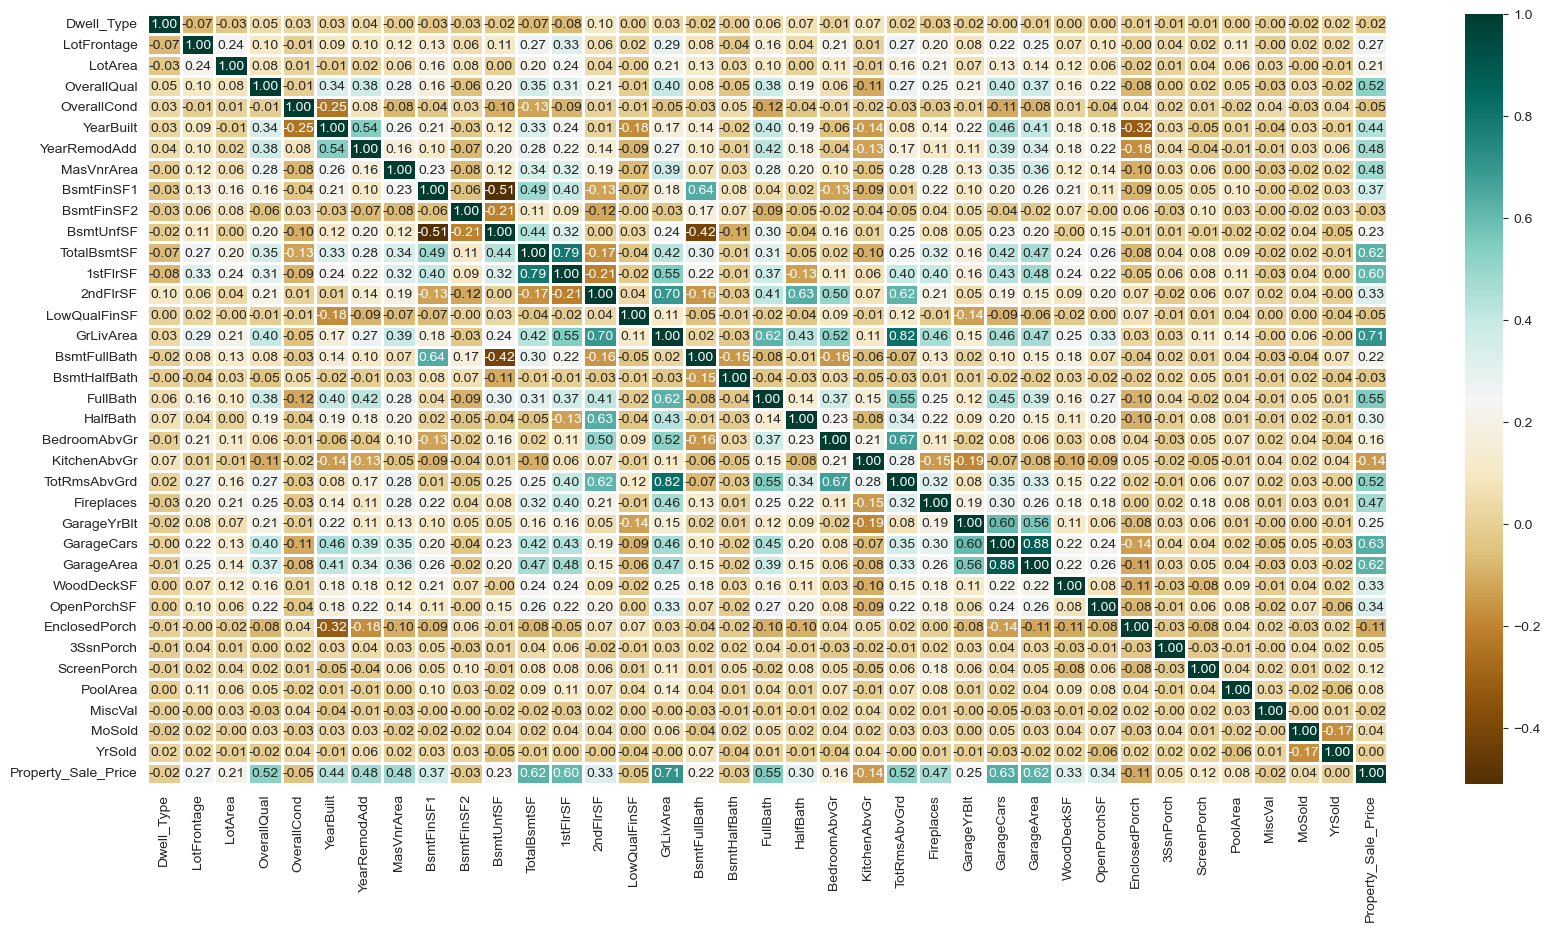

In [147]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


# Numerical and categorical data


In [148]:
data_numeric=data.dtypes[data.dtypes!='object'].index
print("no of numeric columns: ",len(data_numeric))
data_numeric

no of numeric columns:  37


Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [149]:
data.dtypes.nunique()

3

In [150]:
data_cate=data.dtypes[data.dtypes=='object'].index
data_cate

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [151]:
# Importing datetime package for date time operations
import datetime as dt

# using date time package to find the current year
current_year = int(dt.datetime.now().year)

# Subtracting the YearBuilt from current_year to find out the age of the building
building_age = current_year - data['YearBuilt']

# Subtracting the YearRemonAdd from current_year to find out the age since the
# building was remodelled
remodelled_age = current_year - data['YearRemodAdd']

garage_age = current_year - data['GarageYrBlt']

data['building_age'] = building_age
data['remodelled_age'] = remodelled_age
data['garage_age'] = garage_age

In [152]:


s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No. of. categorical features:  43


In [153]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
for i in object_cols:
    data[i]=label_encoder.fit_transform(data[i])

In [154]:
data

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,building_age,remodelled_age,garage_age
0,60,3,65.0,8450,1,1,3,3,0,4,...,1,0,2,2008,8,4,208500,21,21,21.0
1,20,3,80.0,9600,1,1,3,3,0,2,...,1,0,5,2007,8,4,181500,48,48,48.0
2,60,3,68.0,11250,1,1,0,3,0,4,...,1,0,9,2008,8,4,223500,23,22,23.0
3,70,3,60.0,9550,1,1,0,3,0,0,...,1,0,2,2006,8,0,140000,109,54,26.0
4,60,3,84.0,14260,1,1,0,3,0,2,...,1,0,12,2008,8,4,250000,24,24,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,3,70.0,8755,1,1,0,3,0,2,...,1,0,6,2009,8,4,214000,88,25,25.0
2069,90,3,63.0,7711,1,1,0,3,0,4,...,1,0,8,2007,7,0,150000,88,47,2024.0
2070,90,3,313.0,25000,1,1,3,2,0,4,...,1,0,6,2007,8,4,143000,41,28,7.0
2071,20,3,52.0,14375,1,1,0,3,1,1,...,1,0,1,2009,0,0,137500,66,66,66.0


In [155]:
data.dtypes.nunique()

3

In [156]:
data.dtypes

Dwell_Type               int64
Zone_Class               int32
LotFrontage            float64
LotArea                  int64
Road_Type                int32
                        ...   
SaleCondition            int32
Property_Sale_Price      int64
building_age             int64
remodelled_age           int64
garage_age             float64
Length: 83, dtype: object

In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = data.drop(['Property_Sale_Price'], axis=1)
Y = data['Property_Sale_Price']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y,test_size=0.2, random_state=42)


In [158]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred)*100)


28.94253638510757


In [159]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)*100


8.281646778295517

In [160]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred)*100)


11.592149313231182


Since the Random Forest Regressor has the minimum mean absolute percentage error of approx 8.3%, we can conclude that it is best model for property price prediction...